# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

# Problem Statement

We are wondering what locations in Iowa would be most profitable as a growth market.  Find the most profitable county, or County that doesn't have a liquor store anymore.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
## Load the data into a DataFrame
# pd.read_csv()

data = pd.read_csv("../sales.csv")
## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

data.head()

,Unnamed: 0,Store Number,City,2015 Sales,2015 Sales mean,County Number,Price per Liter mean,Zip Code,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1,First Date,Last Date
0,0,2106,CEDAR FALLS,1434021.94,281.070549,7,18.846731,50613,93982.72,18.420760,93.802281,337166.53,337804.05,2015-01-08,2016-03-31
1,1,2113,GOWRIE,85763.42,63.015004,94,17.625704,50543,6500.83,4.776510,21.082425,22351.86,21736.63,2015-01-07,2016-03-30
2,2,2130,WATERLOO,1108184.99,280.624206,7,17.506599,50703,65562.88,16.602401,93.612494,277764.46,306942.27,2015-01-08,2016-03-31
3,3,2152,ROCKWELL,72080.36,50.230216,17,13.043590,50469,6164.92,4.296111,16.824704,16805.11,9307.75,2015-01-08,2016-02-25
4,4,2178,WAUKON,277987.96,104.389020,3,16.594438,52172,21719.49,8.156023,35.011457,54411.42,58939.90,2015-01-07,2016-03-30


In [3]:
#get Q1 Growth for each store
data["Q1 Growth"] = (data["2016 Sales Q1"]-data["2015 Sales Q1"])/data["2015 Sales Q1"]
data["Num_Stores_in_County"] = data.groupby('County Number')['County Number'].transform('count')

In [4]:
#sort data by Q1 growth
growth_sorted_data = data.sort(["Q1 Growth"],ascending=0)
growth_sorted_data

C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Unnamed: 0,Store Number,City,2015 Sales,2015 Sales mean,County Number,Price per Liter mean,Zip Code,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1,First Date,Last Date,Q1 Growth,Num_Stores_in_County
962,962,4811,LOVILIA,11627.69,90.137132,68,17.730487,50150,706.45,5.476357,30.105271,1931.98,2342751.22,2015-01-22,2016-03-31,1211.616704,3
1171,1171,5083,SIOUX CITY,30378.70,108.109253,97,19.437734,51104,1915.57,6.816975,36.069431,2063.34,602233.83,2015-01-13,2016-03-22,290.873288,36
120,120,2628,ELDORA,156957.12,97.914610,42,13.823813,50627,13380.75,8.347318,32.732539,36855.39,2443253.18,2015-01-05,2016-03-31,65.292968,12
176,176,3065,MONTEZUMA,73044.72,58.529423,79,13.761266,50171,6120.75,4.904447,19.568317,12517.29,812011.78,2015-01-08,2015-01-29,63.871213,12
692,692,4499,MILFORD,12453.60,131.090526,30,14.308556,51351,1055.85,11.114211,43.870737,3505.60,169549.28,2015-01-08,2016-03-31,47.365267,10
295,295,3803,STRAWBERRY POINT,46431.17,123.159602,22,12.045780,52076,4122.50,10.935013,41.147427,9734.16,465219.66,2015-01-07,2016-03-29,46.792481,11
1151,1151,5062,MONTROSE,11593.70,91.288976,56,16.717414,52639,899.61,7.083543,30.502598,1463.11,65605.20,2015-01-06,2016-03-29,43.839554,16
26,26,2498,ARLINGTON,27453.07,42.170614,33,13.062834,50606,2568.34,3.945223,14.144793,5577.61,234926.02,2015-01-05,2015-11-02,41.119478,7
544,544,4298,DYSART,37887.78,121.435192,86,12.647352,52224,3152.10,10.102885,40.590000,8745.24,343551.63,2015-01-06,2016-03-29,38.284414,5
278,278,3756,MANNING,98524.64,47.943864,14,16.751343,51455,7048.32,3.429839,16.042852,17531.78,651474.94,2015-01-05,2016-03-21,36.159657,9



# Explore the data


Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

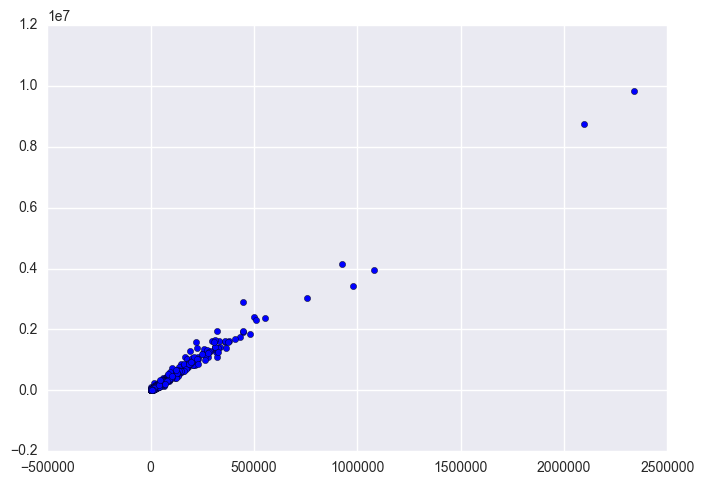

In [5]:
plt.scatter(data["2015 Sales Q1"],data["2015 Sales"])
plt.show()

In [17]:
#create a list of store numbers
store_num_list = list(data["Store Number"].unique())

#create a list of Store Numbers for outlier stores:
#outlier stores would be those that have more than 1.5M in revenue
outlier_list = data["Store Number"][((data["2015 Sales"]>1500000) & (data["2016 Sales Q1"]>0)) | ((data["2015 Sales"]>1500000) & (data["Num_Stores_in_County"]<5) & (data["2016 Sales Q1"]>0))]


In [29]:
data_less_outliers = data[~data["Store Number"].isin(outlier_list)]
data_less_outliers = data_less_outliers[data_less_outliers["2015 Sales Q1"] > 0]
data_less_outliers= data_less_outliers[data_less_outliers["2016 Sales Q1"] > 0]
relevant_growth_stores = data_less_outliers[data_less_outliers["First Date"]< "2015-02-01"]

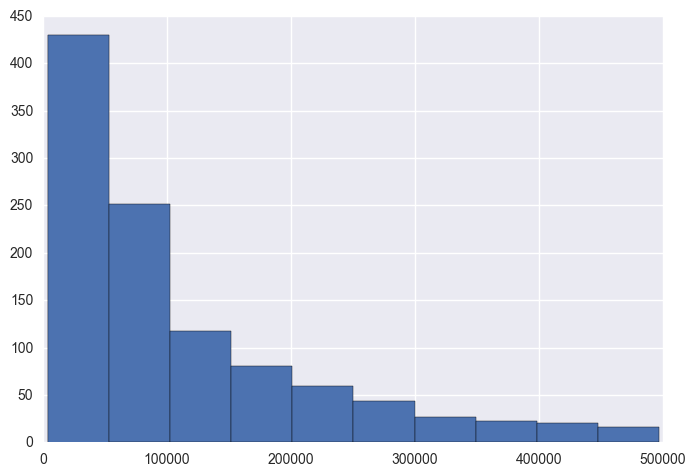

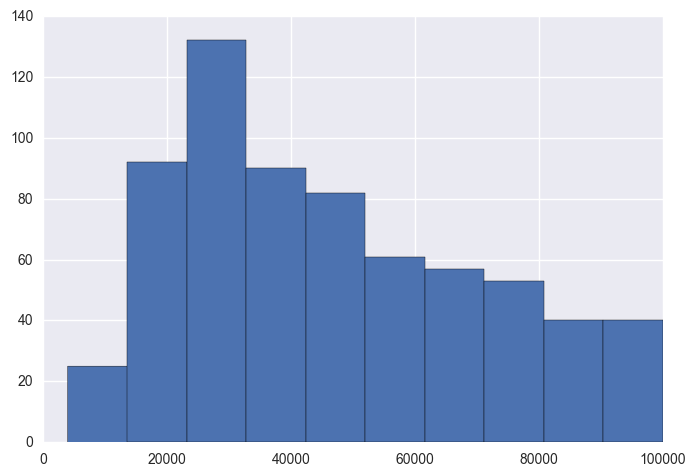

In [19]:

plt.hist(data[data["2015 Sales"]<500000]["2015 Sales"])
plt.show()

plt.hist(data[data["2015 Sales"]<100000]["2015 Sales"])
plt.show()

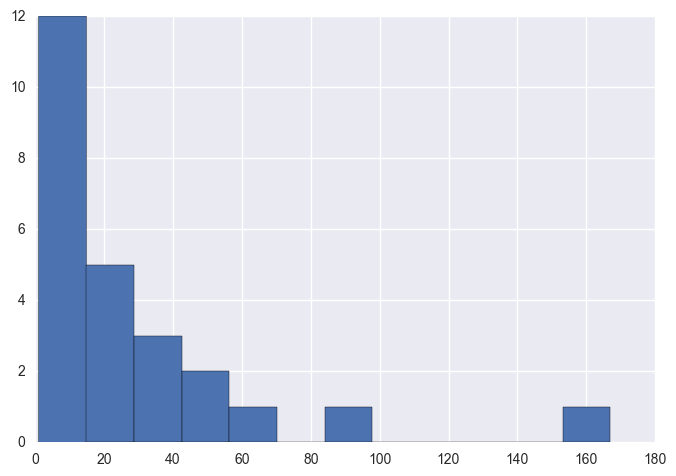

In [7]:
#shows how many counties have what number of stores:
plt.hist(data["Num_Stores_in_County"].unique(), bins = 12)
plt.show()

#graph is skewed right, most counties have very few stores

In [8]:
relevant_growth_stores = data[data["2015 Sales Q1"] > 0]
relevant_growth_stores = relevant_growth_stores[relevant_growth_stores["2016 Sales Q1"] > 0]
relevant_growth_stores = relevant_growth_stores[relevant_growth_stores["First Date"]< "2015-02-01"]
relevant_growth_stores.shape

(1127, 17)

In [11]:
#find which counties have best median growth
median_growth_by_county = pd.pivot_table(relevant_growth_stores,["Q1 Growth","Num_Stores_in_County"], ["County Number"],aggfunc=(np.median,np.mean,max),margins=False,margins_name="All")
median_growth_by_county = median_growth_by_county.sort([("Q1 Growth",'median')],ascending=0)
median_growth_by_county.head(10)

C:\Users\USER\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


Q1 Growth                          Num_Stores_in_County         
                 median        mean          max               median mean max
County Number                                                                 
58             5.558334    5.605810    10.401304                    4    4   4
27             4.847188    8.006961    21.976984                    5    5   5
87             4.750340    4.750340     4.750340                    1    1   1
54             4.072089    2.606459     4.611062                    3    3   3
68             2.684308  404.900029  1211.616704                    3    3   3
93             2.349015    2.349015     2.862187                    2    2   2
12             2.340144    3.699476    15.427592                    7    7   7
15             2.002999    4.122682    17.067469                    8    8   8
89             1.485454    1.826112     4.292625                    3    3   3
65             1.427405    1.509617     4.008423                    6    6   6

In [ ]:
#explore counties by number
print(data[data["County Number"]==54])

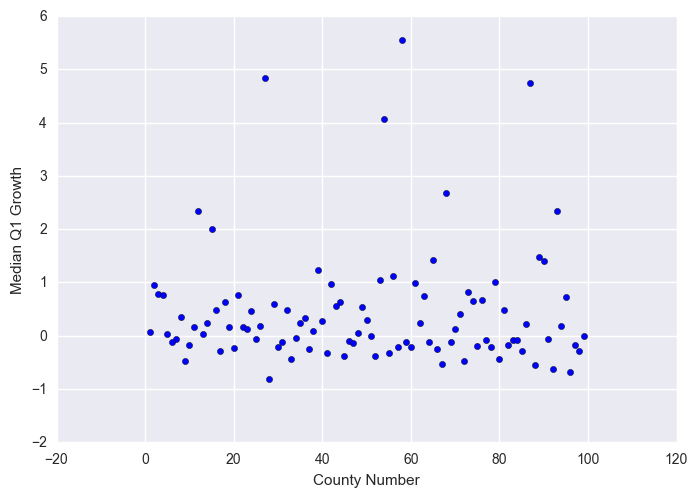

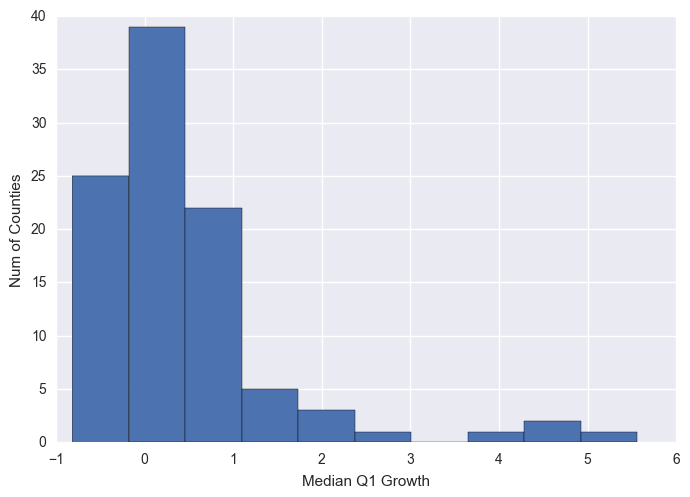

In [20]:
plt.scatter(x=median_growth_by_county.index,y=median_growth_by_county[("Q1 Growth",'median')])
#plt.scatter(x=median_growth_by_county.index,y=median_growth_by_county[("Q1 Growth",'max')],color='r')
plt.xlabel("County Number")
plt.ylabel("Median Q1 Growth")
plt.show()

plt.hist(median_growth_by_county[("Q1 Growth",'median')])
plt.xlabel("Median Q1 Growth")
plt.ylabel("Num of Counties")
plt.show()

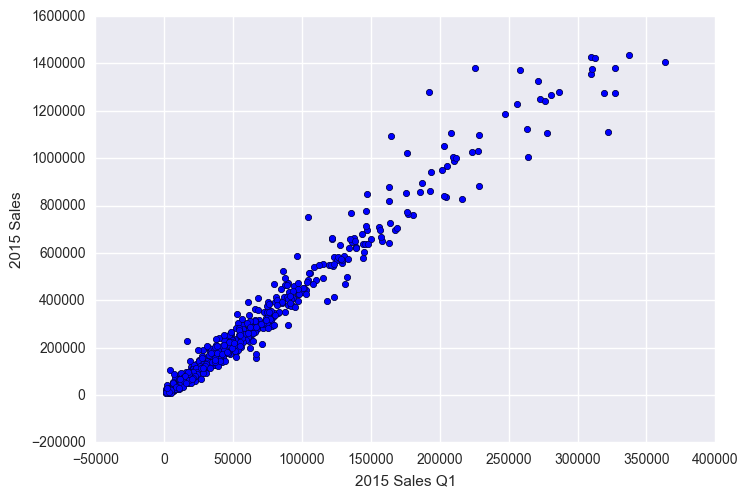

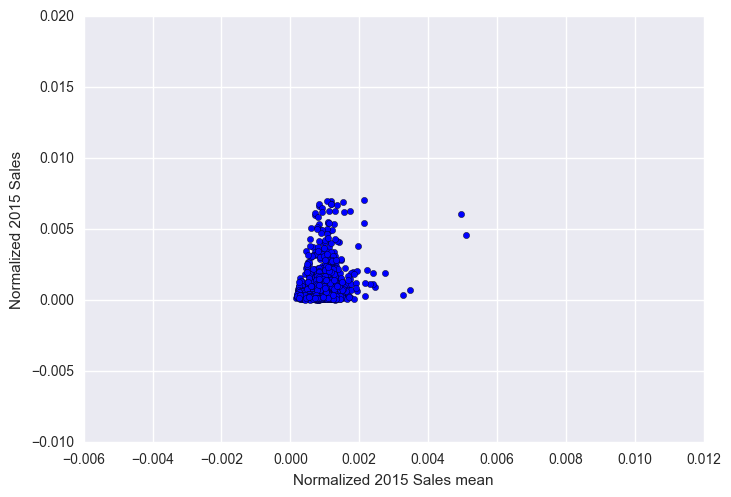

In [35]:
plt.scatter(data_less_outliers["2015 Sales Q1"],data_less_outliers["2015 Sales"])
plt.xlabel("2015 Sales Q1")
plt.ylabel("2015 Sales")
plt.show()
plt.scatter(data_less_outliers["2015 Sales mean"]/sum(data_less_outliers["2015 Sales mean"]),data_less_outliers["2015 Sales"]/sum(data_less_outliers["2015 Sales"]))
plt.xlabel("Normalized 2015 Sales mean")
plt.ylabel("Normalized 2015 Sales")
plt.show()

In [45]:
lm = linear_model.RidgeCV(fit_intercept=False)

predictor_var_list = ["2015 Sales Q1","2015 Sales mean", '2015 Volume Sold (Liters)']
X = data_less_outliers[predictor_var_list]
y = data_less_outliers['2015 Sales']

model_without_outliers = lm.fit(X,y)
print(model_without_outliers.score(X,y))

#Apply to all
predictions = model_without_outliers.predict(data[predictor_var_list])
y = data["2015 Sales"]
print(model_without_outliers.score(data[predictor_var_list],y))

0.986929726305
0.990678238178


In [19]:
categories = ["County Number", "City"]
for category in categories:
    series = data[category]
    dummies = pd.get_dummies(series, prefix=category)
    data = pd.concat([data, dummies], axis=1)
print data.columns
data.head()

Index([u'Unnamed: 0', u'Store Number', u'City', u'2015 Sales',
       u'2015 Sales mean', u'County Number', u'Price per Liter mean',
       u'Zip Code', u'2015 Volume Sold (Liters)',
       u'2015 Volume Sold (Liters) mean',
       ...
       u'City_WEST UNION', u'City_WHEATLAND', u'City_WILLIAMSBURG',
       u'City_WILTON', u'City_WINDSOR HEIGHTS', u'City_WINTERSET',
       u'City_WINTHROP', u'City_WOODBINE', u'City_WOODWARD', u'City_ZWINGLE'],
      dtype='object', length=472)


,Unnamed: 0,Store Number,City,2015 Sales,2015 Sales mean,County Number,Price per Liter mean,Zip Code,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,...,City_WEST UNION,City_WHEATLAND,City_WILLIAMSBURG,City_WILTON,City_WINDSOR HEIGHTS,City_WINTERSET,City_WINTHROP,City_WOODBINE,City_WOODWARD,City_ZWINGLE
0,0,2106,CEDAR FALLS,1434021.94,281.070549,7,18.846731,50613,93982.72,18.420760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2113,GOWRIE,85763.42,63.015004,94,17.625704,50543,6500.83,4.776510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2130,WATERLOO,1108184.99,280.624206,7,17.506599,50703,65562.88,16.602401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2152,ROCKWELL,72080.36,50.230216,17,13.043590,50469,6164.92,4.296111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2178,WAUKON,277987.96,104.389020,3,16.594438,52172,21719.49,8.156023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.